# Ecommerce CSAT Deep Learning Project

**Github**

https://github.com/aniket010011/Intern-Projects

# Problem Description

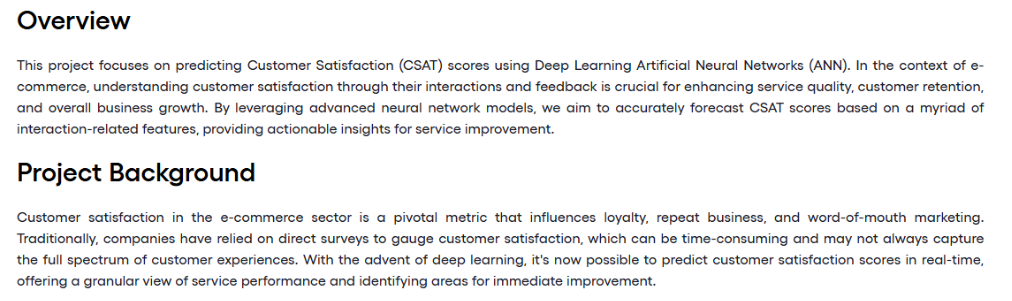

# Objective

Preprocess Data to help with prediction of CSAT scores

Perform Exploratory Data Analysis

Address challenges like imbalance of data for different CSAT scores

Build ANN model to accurately predict CSAT scores

# **Solution**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1


In [ ]:
file_data = '/content/eCommerce_Customer_support_data.csv'
df_data = pd.read_csv(file_data)

In [ ]:
df_data.shape

(85907, 20)

In [ ]:
df_data.head(5)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

## Statistical Summary

In [ ]:
df_data.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


It is evident that our dataset has lot of missing values that need to be dealt with

## Check for Duplicates

In [ ]:
df_data.duplicated().sum()

np.int64(0)

There are no duplicate rows so we proceed to deal with the missing values

## Check for Missing Values

In [ ]:
df_data.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


## Plotting Null values per column

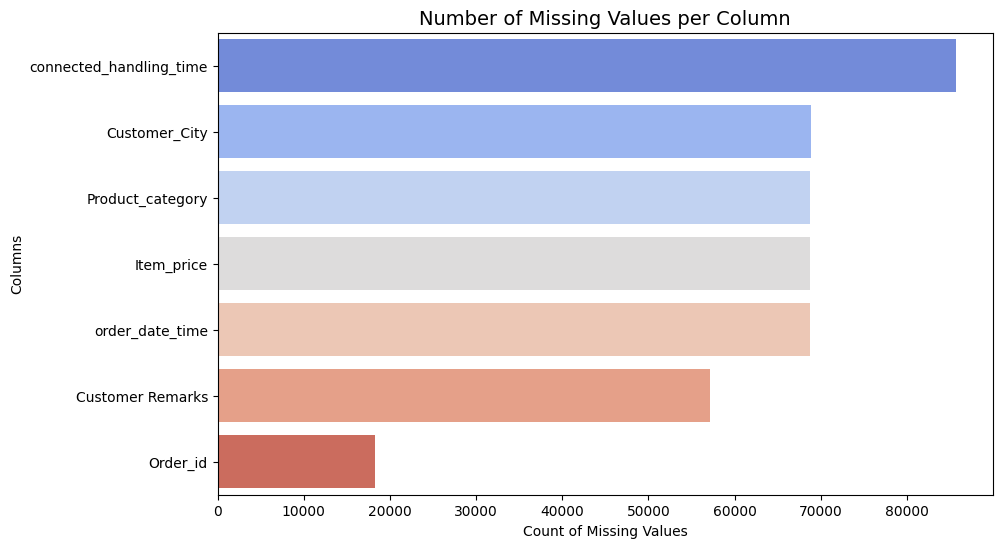

In [ ]:
missing_values = df_data.isna().sum().sort_values(ascending=False)

missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="coolwarm")
plt.title("Number of Missing Values per Column", fontsize=14)
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()

From the plot its clear that the column connected handling time has over 90% missing values so despite being an important marker for determine CSAT score its basically unusable. Other columns like Customer City, product category, item price and order date are also not usable with missing values reaching 70%

## Eliminating Columns

In [ ]:
df_data.drop(['Unique id', 'Order_id', 'order_date_time', 'connected_handling_time', 'Customer_City', 'Product_category', 'Item_price', 'Survey_response_Date'], axis=1, inplace=True)
df_data.head(5)

,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,NaN,01/08/2023 11:13,01/08/2023 11:47,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,NaN,01/08/2023 12:52,01/08/2023 12:54,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,NaN,01/08/2023 20:16,01/08/2023 20:38,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,01/08/2023 20:56,01/08/2023 21:16,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,NaN,01/08/2023 10:30,01/08/2023 10:32,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


## Finding Resolution time

In [ ]:
df_data['Issue_reported at'] = pd.to_datetime(df_data['Issue_reported at'], errors="coerce")
df_data['issue_responded'] = pd.to_datetime(df_data['issue_responded'], errors="coerce")

# calculate resolution time
df_data['resolution_time'] = df_data['issue_responded'] - df_data['Issue_reported at']
df_data['resolution_time'] = df_data['resolution_time'].dt.total_seconds()
df_data.head(5)

,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,resolution_time
0,Outcall,Product Queries,Life Insurance,NaN,2023-01-08 11:13:00,2023-01-08 11:47:00,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,2040.0
1,Outcall,Product Queries,Product Specific Information,NaN,2023-01-08 12:52:00,2023-01-08 12:54:00,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,120.0
2,Inbound,Order Related,Installation/demo,NaN,2023-01-08 20:16:00,2023-01-08 20:38:00,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,1320.0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,2023-01-08 20:56:00,2023-01-08 21:16:00,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,1200.0
4,Inbound,Cancellation,Not Needed,NaN,2023-01-08 10:30:00,2023-01-08 10:32:00,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,120.0


In [ ]:
df_data.drop(['Issue_reported at', 'issue_responded'], axis=1, inplace=True)
df_data.head(5)

,channel_name,category,Sub-category,Customer Remarks,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,resolution_time
0,Outcall,Product Queries,Life Insurance,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,2040.0
1,Outcall,Product Queries,Product Specific Information,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,120.0
2,Inbound,Order Related,Installation/demo,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,1320.0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,1200.0
4,Inbound,Cancellation,Not Needed,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,120.0


## Handling of Missing Values

**Filling Missing Values in Categorical Columns**

In [ ]:
for col in df_data.select_dtypes(include=['object']):
    df_data[col].fillna(df_data[col].mode()[0], inplace=True)

**Filling Missing Values in Numerical Columns**

In [ ]:
for col in df_data.select_dtypes(include=['float64', 'int64']):
    df_data[col].fillna(df_data[col].median(), inplace=True)

In [ ]:
df_data.head(5)

,channel_name,category,Sub-category,Customer Remarks,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,resolution_time
0,Outcall,Product Queries,Life Insurance,Good,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,2040.0
1,Outcall,Product Queries,Product Specific Information,Good,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,120.0
2,Inbound,Order Related,Installation/demo,Good,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,1320.0
3,Inbound,Returns,Reverse Pickup Enquiry,Good,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,1200.0
4,Inbound,Cancellation,Not Needed,Good,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,120.0


In [ ]:
df_data.isna().sum()

,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,0
Agent_name,0
Supervisor,0
Manager,0
Tenure Bucket,0
Agent Shift,0
CSAT Score,0


## Exploratory Data Analysis

**Plotting distribution of CSAT scores by records**

<function matplotlib.pyplot.show(close=None, block=None)>

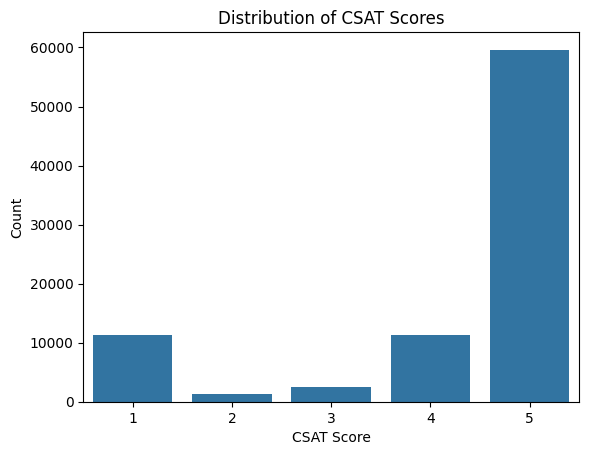

In [ ]:
sns.countplot(x='CSAT Score', data=df_data)
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show

From the chart it can be seen that majority of the CSAT scores are 5 stars, followed by 1 star and 4 star ratings which are similar in count. However this suggests that we have a high imbalance when it comes to number of 5 star ratings and that of other ratings

**CSAT Score by Channels**

<function matplotlib.pyplot.show(close=None, block=None)>

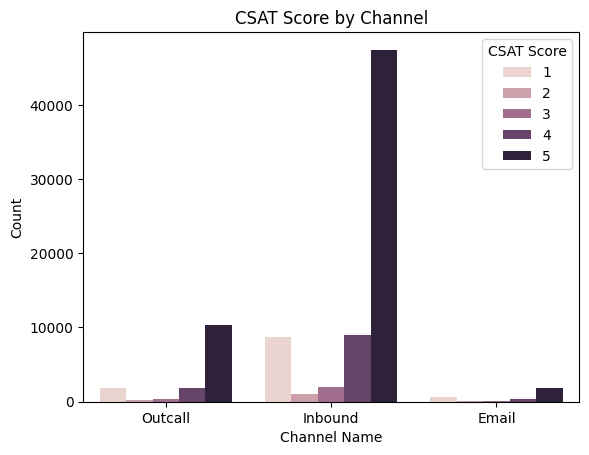

In [ ]:
sns.countplot(x='channel_name', hue='CSAT Score', data=df_data)
plt.title('CSAT Score by Channel')
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.show

Moving over to CSAT scores with respect to channel names, the imbalance among number of ratings doesn't seem to go away. Email channel seems to be the least interacted channel while Inbound channel appears to be the most interacted one

**Agent Shift and CSAT Score**

<function matplotlib.pyplot.show(close=None, block=None)>

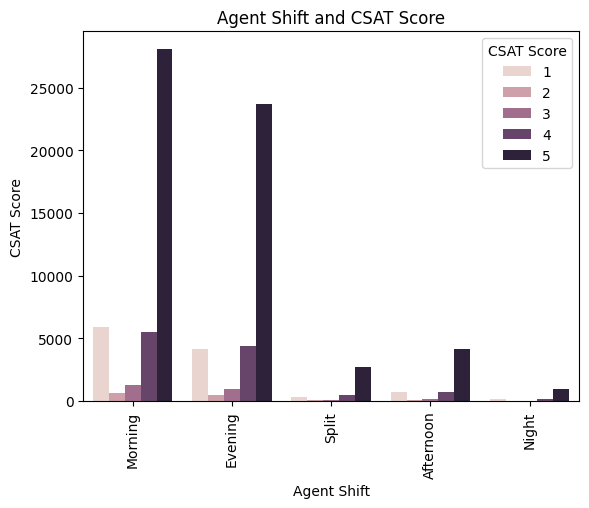

In [ ]:
sns.countplot(x='Agent Shift', hue='CSAT Score', data=df_data)
plt.title('Agent Shift and CSAT Score')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.xticks(rotation=90)
plt.show

This plot shows us that Morning and Evening are the two major shift times with most customer interactions. Class imbalance between CSAT rating classes remain the same across the board

**CSAT Score by Categories**

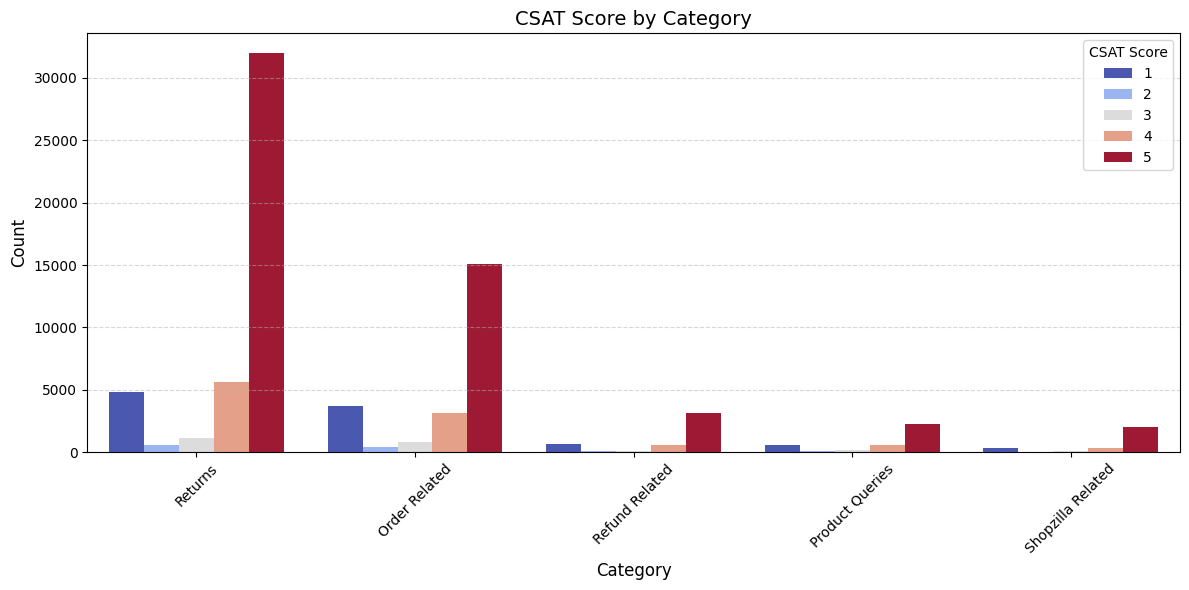

In [ ]:
top_n = df_data['category'].value_counts().nlargest(5).index

df_top = df_data[df_data['category'].isin(top_n)]

order = df_top['category'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='category', order=order, hue='CSAT Score', palette='coolwarm')
plt.title('CSAT Score by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='CSAT Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**CSAT Score by Subcategories**

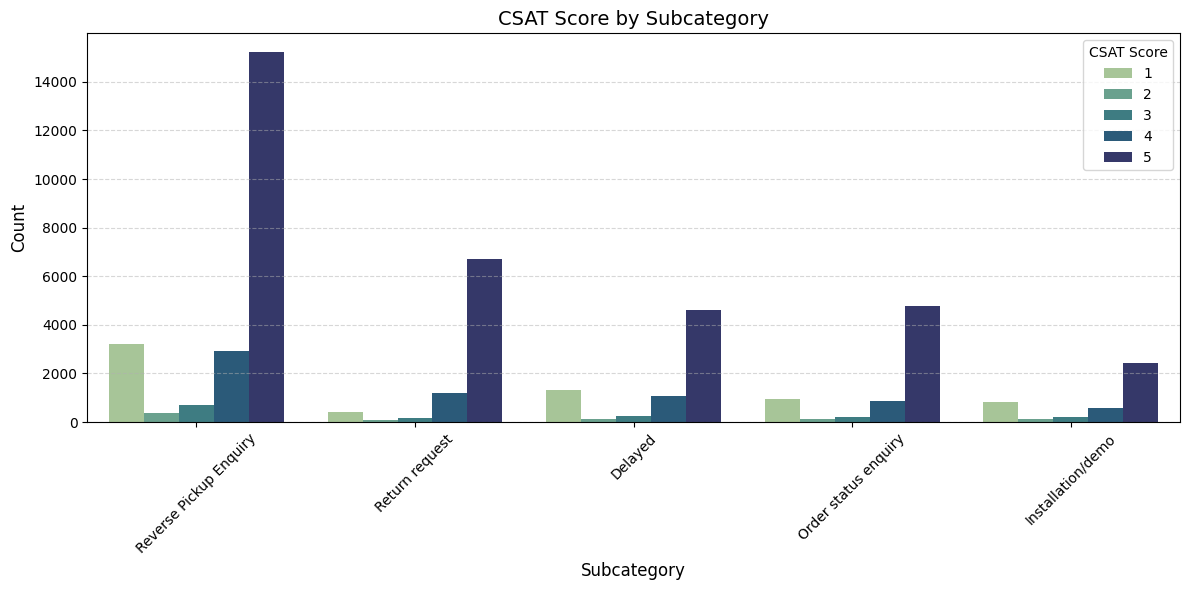

In [ ]:
top_n = df_data['Sub-category'].value_counts().nlargest(5).index

df_top = df_data[df_data['Sub-category'].isin(top_n)]

order = df_top['Sub-category'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='Sub-category', order=order, hue='CSAT Score', palette='crest')
plt.title('CSAT Score by Subcategory', fontsize=14)
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='CSAT Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This plot gives us the top 5 subcategories that customers are interacting with and sharing feedback about and Reverse Pickup Enquiry being the subcategory most interacted with

**CSAT Score by Managers**

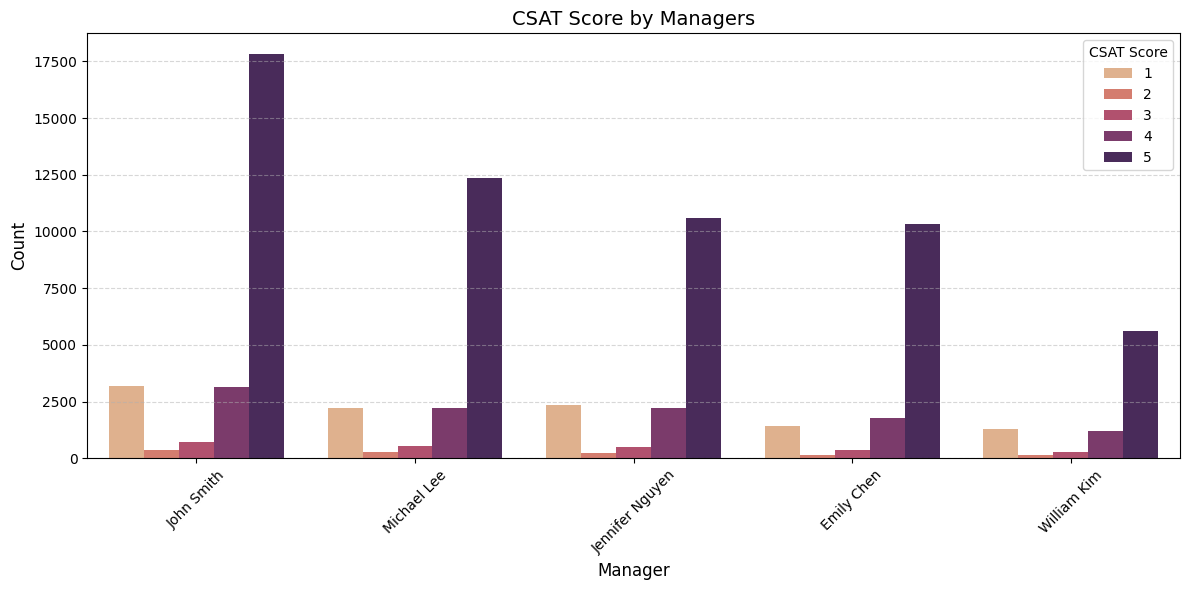

In [ ]:
top_n = df_data['Manager'].value_counts().nlargest(5).index

df_top = df_data[df_data['Manager'].isin(top_n)]

order = df_top['Manager'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='Manager', order=order, hue='CSAT Score', palette='flare')
plt.title('CSAT Score by Managers', fontsize=14)
plt.xlabel('Manager', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='CSAT Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From this plot we get the top 5 managers who are responsible for handling most of the customer interactions. The ratio of the CSAT ratings under all these managers remain similar

**CSAT Score by Supervisor**

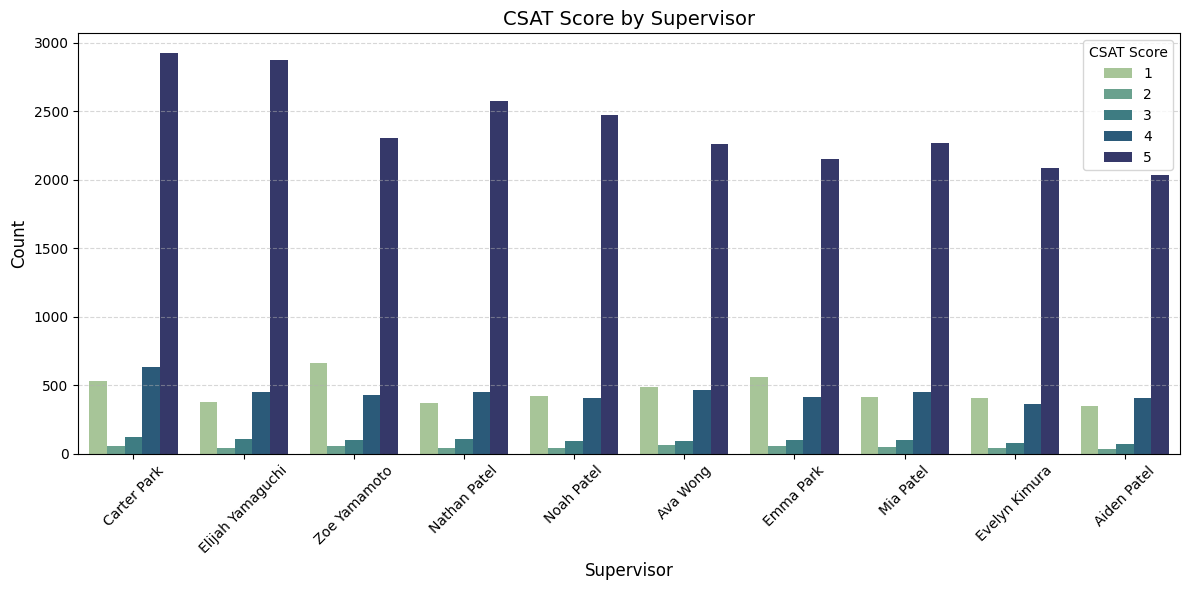

In [ ]:
top_n = df_data['Supervisor'].value_counts().nlargest(10).index

df_top = df_data[df_data['Supervisor'].isin(top_n)]

order = df_top['Supervisor'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='Supervisor', order=order, hue='CSAT Score', palette='crest')
plt.title('CSAT Score by Supervisor', fontsize=14)
plt.xlabel('Supervisor', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='CSAT Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Here we get the top 10 Supervisors with respect to customer interactions. Some Supervisors seem to have less 5 stars and 4 stars than others and also have more 1 stars than others even when considering the ratio. So this appears to be an indicator of the performance of these supervisors  

**Agents by Resolution Time**

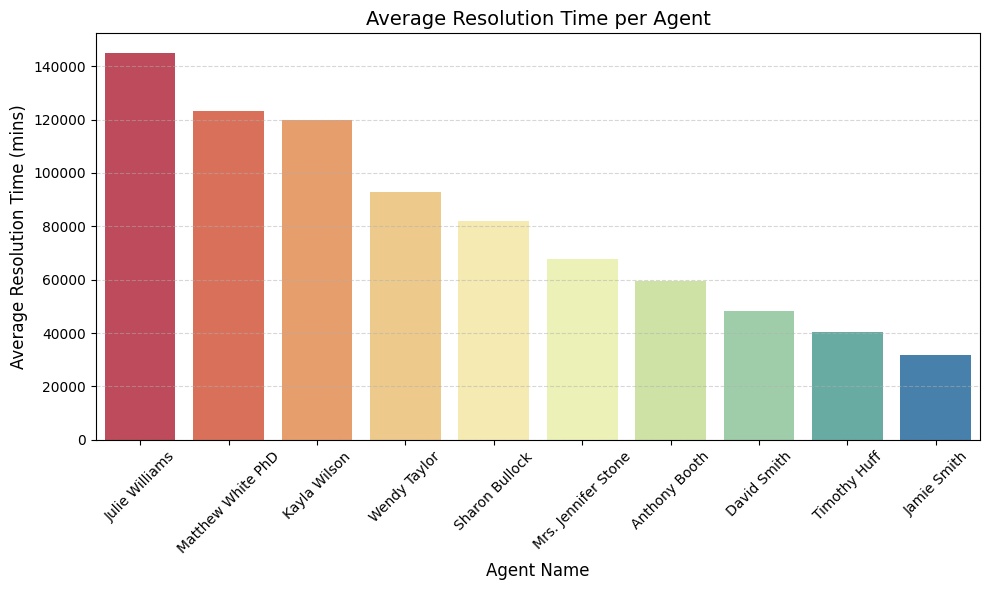

In [ ]:
top_n = df_data['Agent_name'].value_counts().nlargest(10).index

df_top = df_data[df_data['Agent_name'].isin(top_n)]

order = df_top['Agent_name'].value_counts().index

avg_resolution = df_top.groupby('Agent_name', as_index=False)['resolution_time'].mean()

avg_resolution = avg_resolution.sort_values(by='resolution_time', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_resolution, x='Agent_name', y='resolution_time', palette='Spectral')
plt.title('Average Resolution Time per Agent', fontsize=14)
plt.xlabel('Agent Name', fontsize=12)
plt.ylabel('Average Resolution Time (mins)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This plot shows how much average time was taken to resolve issues under each the agents. Hence this also appears to be an important indicator of performance of the agents

## Encoding Dataset and Train Test Split

In [ ]:
tfidf = TfidfVectorizer(max_features=300)
remarks_tfidf = tfidf.fit_transform(df_data['Customer Remarks'])
remarks_df_data = pd.DataFrame(remarks_tfidf.toarray(), columns=tfidf.get_feature_names_out())
final_df = pd.concat([df_data, remarks_df_data], axis=1)
final_df.head(5)

,channel_name,category,Sub-category,Customer Remarks,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,...,with,without,work,working,worst,would,wrong,yet,you,your
0,Outcall,Product Queries,Life Insurance,Good,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Outcall,Product Queries,Product Specific Information,Good,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Inbound,Order Related,Installation/demo,Good,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Inbound,Returns,Reverse Pickup Enquiry,Good,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Inbound,Cancellation,Not Needed,Good,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.shape

(85907, 311)

In [ ]:
final_df.columns

Index(['channel_name', 'category', 'Sub-category', 'Customer Remarks',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score',
       ...
       'with', 'without', 'work', 'working', 'worst', 'would', 'wrong', 'yet',
       'you', 'your'],
      dtype='object', length=311)

In [ ]:
final_df.drop(['Customer Remarks'], axis=1, inplace=True)

In [ ]:
final_df.shape

(85907, 310)

In [ ]:
y = final_df['CSAT Score']
X = final_df.drop(['CSAT Score'], axis=1)

In [ ]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
    )

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

## Applying Smote to address imbalance of data among the 5 CSAT ratings

In [ ]:
smote = SMOTE(random_state=42)

pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', smote)
])

In [ ]:
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)
X_test_trans = pipeline.named_steps['preprocess'].transform(X_test)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_res))

Before SMOTE: [ 7861   898  1791  7853 41731]
After SMOTE : [41731 41731 41731 41731 41731]


In [ ]:
num_classes = len(np.unique(y_train_res))
y_train_cat = to_categorical(y_train_res, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

## Model Building and Execution

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_res.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       460,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 506,117 (1.93 MB)

 Trainable params: 505,157 (1.93 MB)

 Non-trainable params: 960 (3.75 KB)

None


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history = model.fit(
    X_train_res,
    y_train_cat,
    epochs=32,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/32
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.4372 - loss: 1.3675 - val_accuracy: 0.1600 - val_loss: 2.3528 - learning_rate: 0.0010
Epoch 2/32
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7036 - loss: 0.7954 - val_accuracy: 0.1787 - val_loss: 2.1368 - learning_rate: 0.0010
Epoch 3/32
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.7723 - loss: 0.6254 - val_accuracy: 0.1794 - val_loss: 1.9034 - learning_rate: 0.0010
Epoch 4/32
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.8026 - loss: 0.5486 - val_accuracy: 0.1801 - val_loss: 1.7955 - learning_rate: 0.0010
Epoch 5/32
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.8205 - loss: 0.5028 - val_accuracy: 0.1806 - val_loss: 1.8607 - learning_rate: 0.0010
Epoch 6/32
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.8326 - loss: 0.4732 - val_accuracy: 0.1801 - val_loss: 1.9970 - learning_rate: 0.0010
Epoch 7/32
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accura

## Prediction Score, Validation and Output

In [ ]:
loss, acc = model.evaluate(X_test_trans, y_test_cat, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

Test Loss: 1.3251
Test Accuracy: 0.6773


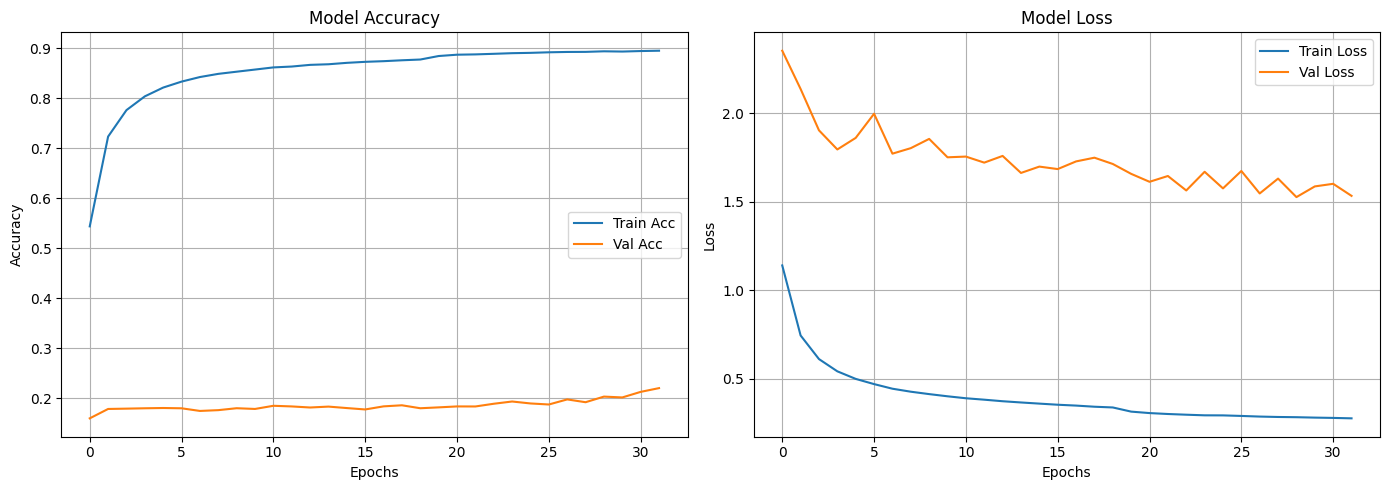

In [ ]:
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

The plots for both Accuracy and loss shows us that the number of epochs chosen is already starting to approach a point of diminishing returns and setting higher epochs might end up overfitting the model instead of improving prediction

806/806 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.35      0.39      3369
           2       0.01      0.01      0.01       385
           3       0.04      0.03      0.04       767
           4       0.18      0.01      0.01      3366
           5       0.73      0.91      0.81     17886

    accuracy                           0.68     25773
   macro avg       0.28      0.26      0.25     25773
weighted avg       0.59      0.68      0.62     25773



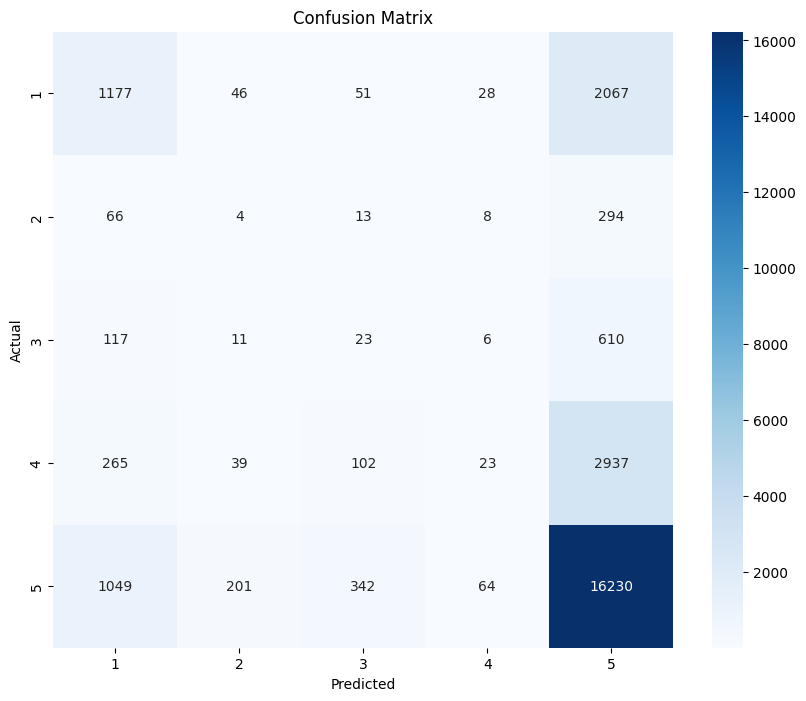

In [ ]:
y_pred_probs = model.predict(X_test_trans)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))

# Confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The heatmap of the output shows us how the model is giving us predictions for multiple classes of CSAT ratings. From the earlier graphs we already observed that 5 star ratings are in majority followed by 1 star and 4 star ratings. These are the only ratings we find in substantial numbers from the test records which means the model is predicting as we expected it to predict from the given dataset

**Saving the model**

In [ ]:
joblib.dump(pipeline, 'preprocessing_pipeline.pkl')


['preprocessing_pipeline.pkl']

In [ ]:
model.save('deep_learning_model.h5')

In [ ]:
joblib.dump(le, "label_encoder.pkl", compress=3)

['label_encoder.pkl']

In [ ]:
import tensorflow
print("tensorflow", tensorflow.__version__)

tensorflow 2.19.0


# Conclusion

In conclusion we have analysed the dataset, handled missing values, performed feature engineering and proceeded to conduct exploratory data analysis(EDA).

From the EDA we observed an apparent imbalance among the count of different CSAT ratings received from customers. The graphs not only give us the top fields but plots of supervisors and agents also give us performance indicators that can be worked upon.

The model is giving us about 67% accuracy and based on the output appears to perform as we expect it to.